### Problem Statement:
Analyze data on service request (311) calls from New York City. And also asked to utilize data wrangling techniques to understand the patterns in the data and visualize the major types of complaints.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r'C:\Users\hima ratheesh\AppData\Local\Temp\d5a3662d-176b-4b5d-bd22-aff837a863f0_Customer_Service_Requests_Analysis_Dataset.zip.3f0\Customer_Service_Requests_Analysis_Dataset\311-service-requests-nyc.zip', low_memory = False)


In [62]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"[40.775945312321085, -73.91509393898605]"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"[40.870324522111424, -73.88852464418646]"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"[40.83599404683083, -73.82837939584206]"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"[40.733059618956815, -73.87416975810375]"


### --------------------------------------------------------------------------------------------------
### Identifying the shape of the dataset

In [63]:
df.shape

(364558, 35)

### --------------------------------------------------------------------------------------------------
### Identifying variables with null values

In [64]:
df.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2381
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                        6501
Location Type                        0
Incident Zip                      2998
Address Type                         0
City                                 0
Facility Type                        0
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2402
Community Board                      0
Borough                              0
X Coordinate (State Plane)           0
Y Coordinate (State Plane)           0
Park Facility Name                   0
Park Borough                         0
School Name                          0
School Number                        0
School Region                        1
School Code              

In [6]:
(df.isna().sum() / len(df)) * 100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [65]:
series_na=round((df.isna().sum() / len(df)) * 100 , 2)

In [8]:
series_na

Unique Key                          0.00
Created Date                        0.00
Closed Date                         0.65
Agency                              0.00
Agency Name                         0.00
Complaint Type                      0.00
Descriptor                          1.78
Location Type                       0.04
Incident Zip                        0.82
Incident Address                   14.18
Street Name                        14.18
Cross Street 1                     15.69
Cross Street 2                     15.86
Intersection Street 1              85.98
Intersection Street 2              86.14
Address Type                        0.89
City                                0.82
Landmark                           99.90
Facility Type                       0.66
Status                              0.00
Due Date                            0.00
Resolution Description              0.00
Resolution Action Updated Date      0.66
Community Board                     0.00
Borough         

In [9]:
series_na[series_na>20] #extracting all greater than 20%

Intersection Street 1            85.98
Intersection Street 2            86.14
Landmark                         99.90
School or Citywide Complaint    100.00
Vehicle Type                    100.00
Taxi Company Borough            100.00
Taxi Pick Up Location           100.00
Bridge Highway Name              99.92
Bridge Highway Direction         99.92
Road Ramp                        99.93
Bridge Highway Segment           99.93
Garage Lot Name                 100.00
Ferry Direction                 100.00
Ferry Terminal Name             100.00
dtype: float64

In [10]:
col=list(series_na[series_na>20].index) #storing as list in col
col

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

In [11]:
df.drop(col, axis=1 , inplace= True)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [12]:
series_na=round(df.isna().sum() / len(df) *100 , 2)

In [13]:
series_na

Unique Key                         0.00
Created Date                       0.00
Closed Date                        0.65
Agency                             0.00
Agency Name                        0.00
Complaint Type                     0.00
Descriptor                         1.78
Location Type                      0.04
Incident Zip                       0.82
Incident Address                  14.18
Street Name                       14.18
Cross Street 1                    15.69
Cross Street 2                    15.86
Address Type                       0.89
City                               0.82
Facility Type                      0.66
Status                             0.00
Due Date                           0.00
Resolution Description             0.00
Resolution Action Updated Date     0.66
Community Board                    0.00
Borough                            0.00
X Coordinate (State Plane)         1.11
Y Coordinate (State Plane)         1.11
Park Facility Name                 0.00


### --------------------------------------------------------------------------------------------------

##### Performing basic data exploratory analysis:

###### :Utilize missing value treatment

In [14]:
col_na=series_na[series_na>0]

In [15]:
col_na

Closed Date                        0.65
Descriptor                         1.78
Location Type                      0.04
Incident Zip                       0.82
Incident Address                  14.18
Street Name                       14.18
Cross Street 1                    15.69
Cross Street 2                    15.86
Address Type                       0.89
City                               0.82
Facility Type                      0.66
Resolution Action Updated Date     0.66
X Coordinate (State Plane)         1.11
Y Coordinate (State Plane)         1.11
Latitude                           1.11
Longitude                          1.11
Location                           1.11
dtype: float64

In [16]:
columns_to_drop=['Incident Address','Street Name','Cross Street 1','Cross Street 2']

In [17]:
##dropping unnecessary columns from na columns

df.drop(columns_to_drop  , axis=1 , inplace= True)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [18]:
series_na=round(df.isna().sum() / len(df) *100 , 2)
col_na=series_na[series_na>0]
col_na

Closed Date                       0.65
Descriptor                        1.78
Location Type                     0.04
Incident Zip                      0.82
Address Type                      0.89
City                              0.82
Facility Type                     0.66
Resolution Action Updated Date    0.66
X Coordinate (State Plane)        1.11
Y Coordinate (State Plane)        1.11
Latitude                          1.11
Longitude                         1.11
Location                          1.11
dtype: float64

In [19]:
df[list(col_na.index)].head()

,Closed Date,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Resolution Action Updated Date,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,01/01/2016 12:55:15 AM,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,01/01/2016 12:55:15 AM,1005409.0,254678.0,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,01/01/2016 01:26:57 AM,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,01/01/2016 01:26:57 AM,1007766.0,221986.0,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,01/01/2016 04:51:03 AM,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,01/01/2016 04:51:03 AM,1015081.0,256380.0,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,01/01/2016 07:43:13 AM,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,01/01/2016 07:43:13 AM,1031740.0,243899.0,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,01/01/2016 03:24:42 AM,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,01/01/2016 03:24:42 AM,1019123.0,206375.0,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [20]:
df[list(col_na.index)].head(2)

,Closed Date,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Resolution Action Updated Date,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,01/01/2016 12:55:15 AM,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,01/01/2016 12:55:15 AM,1005409.0,254678.0,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,01/01/2016 01:26:57 AM,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,01/01/2016 01:26:57 AM,1007766.0,221986.0,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


## ....

In [ ]:
for i in ['Descriptor','Location Type','Address Type']:

In [91]:
df[df['Descriptor'].isna()==True]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,resolution_time,resolution_time_seconds
313,32308417,2015-12-31 16:48:37,2015-12-31 20:19:11,NYPD,New York City Police Department,Bike/Roller/Skate Chronic,NaN,Street/Sidewalk,10306.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.561067,-74.102451,"[40.561067138026026, -74.10245138990679]",0 days 03:30:34,12634.0
374,32309343,2015-12-31 15:26:19,2015-12-31 18:58:30,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,10025.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.792623,-73.973246,"[40.79262304288245, -73.97324623320404]",0 days 03:32:11,12731.0
392,32308660,2015-12-31 14:49:12,2015-12-31 15:33:58,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10027.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.807242,-73.944248,"[40.807242061858965, -73.94424833278725]",0 days 00:44:46,2686.0
435,32305136,2015-12-31 13:49:05,2015-12-31 18:34:15,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10002.0,INTERSECTION,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.723650,-73.991024,"[40.72365037422938, -73.99102396312567]",0 days 04:45:10,17110.0
459,32307926,2015-12-31 13:09:36,2015-12-31 15:21:49,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10016.0,BLOCKFACE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.745611,-73.986622,"[40.7456107208286, -73.9866217295699]",0 days 02:12:13,7933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364034,29615059,2015-01-01 20:27:07,2015-01-01 21:22:41,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10003.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.735678,-73.986934,"[40.735677501528336, -73.98693404490251]",0 days 00:55:34,3334.0
364087,29615345,2015-01-01 18:20:45,2015-01-01 18:34:15,NYPD,New York City Police Department,Urinating in Public,NaN,Residential Building/House,10303.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.636119,-74.145367,"[40.63611860491434, -74.14536668897534]",0 days 00:13:30,810.0
364174,29614012,2015-01-01 14:41:54,2015-01-01 19:03:17,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10003.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.735678,-73.986934,"[40.735677501528336, -73.98693404490251]",0 days 04:21:23,15683.0
364354,29615085,2015-01-01 07:21:19,2015-01-01 10:16:10,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,11411.0,INTERSECTION,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.691047,-73.739223,"[40.69104664978981, -73.73922324000723]",0 days 02:54:51,10491.0


In [22]:
#based on complaint type we will see the famous descriptor

df.groupby(['Complaint Type' ,'Descriptor']).agg({'Agency': 'count'})

Agency
Complaint Type           Descriptor                            
Agency Issues            Language Access Complaint            8
Animal Abuse             Chained                            695
                         In Car                             299
                         Neglected                         5131
                         No Shelter                         886
                         Other (complaint details)         2489
                         Tortured                          1041
Animal in a Park         Animal Waste                         1
Blocked Driveway         No Access                        75888
                         Partial Access                   24993
Derelict Vehicle         With License Plate               21661
Disorderly Youth         Nuisance/Truant                     43
                         Playing in Unsuitable Place        272
Drinking                 After Hours - Licensed Est          93
                         In Public                          971
                         Underage - Licensed Est            345
Ferry Complaint          Disruptive Passenger                 1
                         Homeless Issue                       1
Graffiti                 Police Report Not Requested         35
                         Police Report Requested            122
Illegal Parking          Blocked Hydrant                  19989
                         Blocked Sidewalk                 13860
                         Commercial Overnight Parking     14997
                         Detached Trailer                   582
                         Double Parked Blocking Traffic    7164
                         Double Parked Blocking Vehicle    5167
                         Overnight Commercial Storage      2102
                         Posted Parking Sign Violation    27200
                         Unauthorized Bus Layover          1618
Noise - Commercial       Banging/Pounding                  4663
                         Car/Truck Horn                    1368
                         Car/Truck Music                   1021
                         Loud Music/Party                 32479
                         Loud Talking                      4466
                         Loud Television                    112
Noise - House of Worship Banging/Pounding                   296
                         Loud Music/Party                   588
                         Loud Talking                       184
                         Loud Television                      2
Noise - Park             Loud Music/Party                  3153
                         Loud Talking                       956
Noise - Street/Sidewalk  Loud Music/Party                 33488
                         Loud Talking                     18204
Noise - Vehicle          Car/Truck Horn                    3110
                         Car/Truck Music                  10919
                         Engine Idling                     5323
Posting Advertisement    Building                            79
                         Vehicle                            602
Traffic                  Chronic Speeding                   306
                         Chronic Stoplight Violation        339
                         Congestion/Gridlock               3237
                         Drag Racing                        191
                         Truck Route Violation             1125
Vending                  In Prohibited Area                2206
                         Unlicensed                        1986

In [23]:
series_na=round(df.isna().sum() / len(df) *100 , 2)
col_na=series_na[series_na>0]
col_na

Closed Date                       0.65
Descriptor                        1.78
Location Type                     0.04
Incident Zip                      0.82
Address Type                      0.89
City                              0.82
Facility Type                     0.66
Resolution Action Updated Date    0.66
X Coordinate (State Plane)        1.11
Y Coordinate (State Plane)        1.11
Latitude                          1.11
Longitude                         1.11
Location                          1.11
dtype: float64

In [24]:
for i in['Location Type','City','Address Type','Facility Type']:
    df[i].fillna(df[i].mode()[0] , inplace = True)

In [25]:
series_na=round(df.isna().sum() / len(df) *100 , 2)
col_na=series_na[series_na>0]
col_na

Closed Date                       0.65
Descriptor                        1.78
Incident Zip                      0.82
Resolution Action Updated Date    0.66
X Coordinate (State Plane)        1.11
Y Coordinate (State Plane)        1.11
Latitude                          1.11
Longitude                         1.11
Location                          1.11
dtype: float64

In [26]:
loc_col=['X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude']

In [27]:
Grp=df.groupby('City').mean()[loc_col]
Grp

,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
City,,,,
ARVERNE,1.041269e+06,155051.771318,40.592074,-73.794696
ASTORIA,1.006436e+06,218671.264234,40.766850,-73.919907
Astoria,1.006736e+06,218534.681015,40.766475,-73.918825
BAYSIDE,1.046241e+06,218949.182171,40.767424,-73.776205
BELLEROSE,1.061209e+06,206584.782341,40.733369,-73.722310
BREEZY POINT,1.013154e+06,144957.096774,40.564502,-73.895969
BRONX,1.017858e+06,249095.142336,40.850315,-73.878520
BROOKLYN,9.961974e+05,177941.196695,40.655070,-73.956936
CAMBRIA HEIGHTS,1.056868e+06,192470.053485,40.694665,-73.738126


In [28]:
cc=df[df['Latitude'].isna()==True]
cc

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,01/02/2016 01:04:03 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
283,32309451,12/31/2015 05:40:16 PM,01/01/2016 10:59:11 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
302,32309860,12/31/2015 05:05:30 PM,01/01/2016 08:17:35 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
434,32306605,12/31/2015 01:51:35 PM,12/31/2015 02:32:56 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11377.0,BLOCKFACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363789,29619230,01/02/2015 07:25:16 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
363805,29618672,01/02/2015 06:14:06 AM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
364053,29618280,01/01/2015 07:24:31 PM,01/01/2015 11:44:53 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
364151,29617561,01/01/2015 04:04:35 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN


In [29]:
uni_city=df[df['Latitude'].isna()==True]['City'].unique() #for the cities where latitudes and longitudes are missing
uni_city

array(['BROOKLYN', 'WOODSIDE', 'NEW YORK', 'BRONX', 'FOREST HILLS',
       'STATEN ISLAND', 'FLUSHING', 'OAKLAND GARDENS', 'FRESH MEADOWS',
       'RIDGEWOOD', 'ASTORIA', 'JAMAICA', 'LONG ISLAND CITY',
       'SOUTH RICHMOND HILL', 'ROCKAWAY PARK', 'ROSEDALE', 'CORONA',
       'REGO PARK', 'BAYSIDE', 'HOWARD BEACH', 'FAR ROCKAWAY', 'QUEENS',
       'MASPETH', 'ARVERNE', 'MIDDLE VILLAGE', 'WHITESTONE'], dtype=object)

In [30]:
df[df['Latitude'].isna()==True][loc_col].isna().sum()

X Coordinate (State Plane)    4030
Y Coordinate (State Plane)    4030
Latitude                      4030
Longitude                     4030
dtype: int64

In [31]:
for i in uni_city:
    df.loc[(df['Latitude'].isna()==True) &
           (df['City']==i) , loc_col]= tuple (Grp.loc[i,loc_col].values)

In [32]:
series_na=round(df.isna().sum() / len(df) *100 , 2)
col_na=series_na[series_na>0]
col_na

Closed Date                       0.65
Descriptor                        1.78
Incident Zip                      0.82
Resolution Action Updated Date    0.66
Location                          1.11
dtype: float64

In [33]:
df['Location']= tuple(df[['Latitude','Longitude']].values)
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"[40.775945312321085, -73.91509393898605]"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"[40.870324522111424, -73.88852464418646]"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"[40.83599404683083, -73.82837939584206]"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"[40.733059618956815, -73.87416975810375]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.695145,-73.860949,"[40.69514470265117, -73.86094888534394]"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.867830,-73.907178,"[40.86782963689454, -73.90717786644662]"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"[40.821646626438095, -73.95087342885292]"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.886361,-73.853290,"[40.88636077906953, -73.85329048666742]"


In [34]:
series_na=round(df.isna().sum() / len(df) *100 , 2)
col_na=series_na[series_na>0]
col_na

Closed Date                       0.65
Descriptor                        1.78
Incident Zip                      0.82
Resolution Action Updated Date    0.66
dtype: float64

### --------------------------------------------------------------------------------------------------



### Analysing the date column and remove the entries if it has an incorrect timeline

In [35]:
df[['Created Date' , 'Closed Date','Resolution Action Updated Date']]

,Created Date,Closed Date,Resolution Action Updated Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 12:55:15 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 01:26:57 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 04:51:03 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:43:13 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 03:24:42 AM
...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 10:22:31 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 02:25:02 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 12:20:33 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 02:42:22 AM


In [36]:
date_col =['Created Date' , 'Closed Date','Resolution Action Updated Date']

In [37]:
for i in date_col:
    df[i] = pd.to_datetime(df[i])
    print(i)

Created Date
Closed Date
Resolution Action Updated Date


In [38]:
df[date_col]

,Created Date,Closed Date,Resolution Action Updated Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15,2016-01-01 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:57,2016-01-01 01:26:57
2,2015-12-31 23:59:29,2016-01-01 04:51:03,2016-01-01 04:51:03
3,2015-12-31 23:57:46,2016-01-01 07:43:13,2016-01-01 07:43:13
4,2015-12-31 23:56:58,2016-01-01 03:24:42,2016-01-01 03:24:42
...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,2015-01-01 10:22:31
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,2015-01-01 02:25:02
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,2015-01-01 00:20:33
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,2015-01-01 02:42:22


In [39]:
df[df['Resolution Action Updated Date']< df['Created Date']]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
61086,31880851,2015-11-01 01:57:24,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11378.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.729259,-73.900223,"[40.72925894967772, -73.90022336472336]"
61095,31886638,2015-11-01 01:54:37,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11233.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.678310,-73.925082,"[40.678310248732046, -73.9250822918449]"
61098,31884397,2015-11-01 01:53:10,NaT,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,10024.0,INTERSECTION,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.789051,-73.970301,"[40.78905142646646, -73.970300867221]"
61111,31884894,2015-11-01 01:46:36,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.844217,-73.939656,"[40.84421656446944, -73.93965613439441]"
61119,31885698,2015-11-01 01:43:18,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10032.0,LATLONG,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.843961,-73.939031,"[40.84396097798872, -73.9390310996927]"


### Frequency plot for city-wise complaints

In [40]:
#checking if any duplicates of complaints

In [41]:
df['Unique Key'].duplicated().sum()

0

In [42]:
df['City'].value_counts()

BROOKLYN               121859
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

<AxesSubplot:>

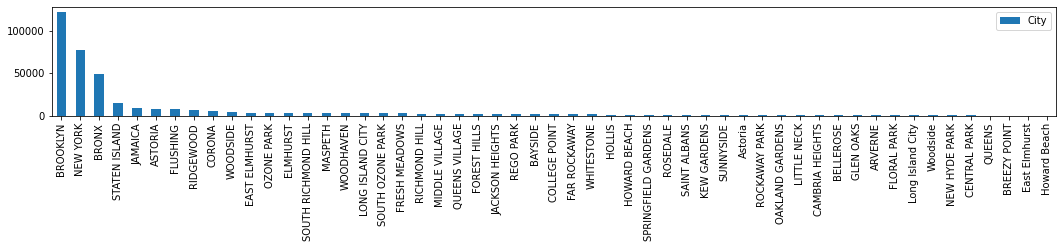

In [43]:
df['City'].value_counts().to_frame().plot(kind='bar', figsize=(18,2))

<AxesSubplot:>

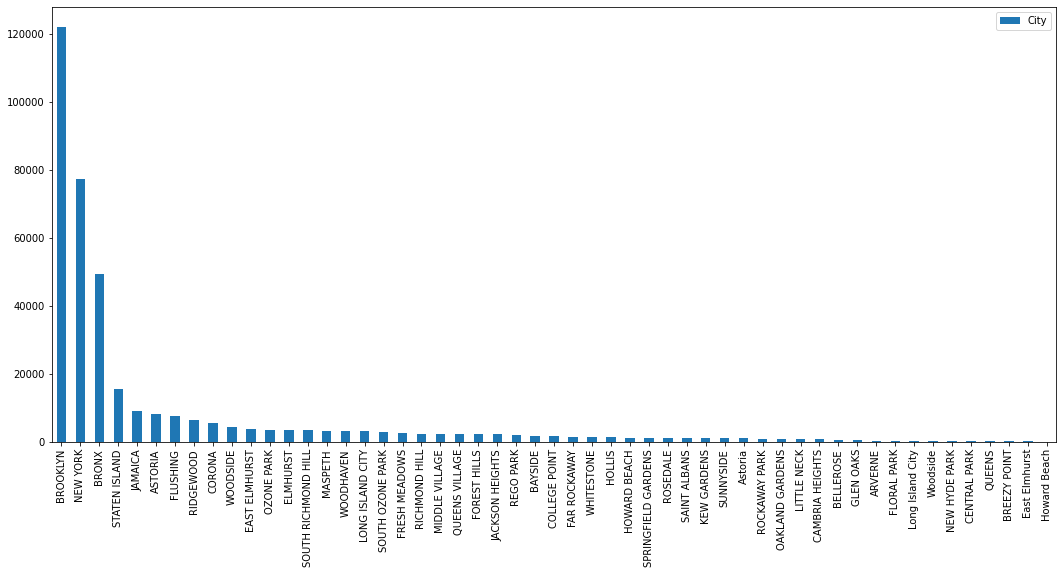

In [44]:
df['City'].value_counts().to_frame().plot(kind='bar', figsize=(18,8))

<AxesSubplot:>

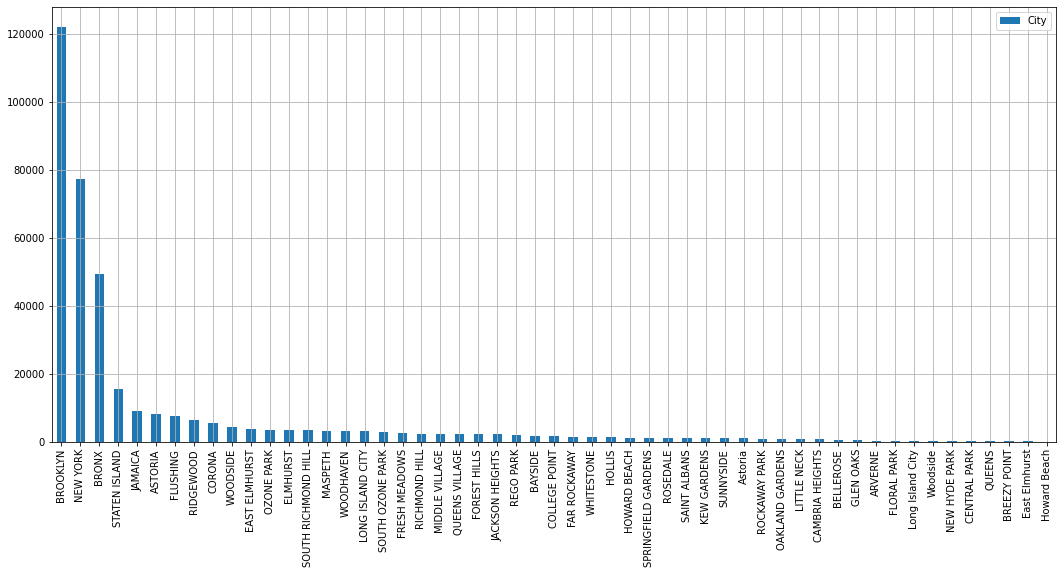

In [45]:
df['City'].value_counts().to_frame().plot(kind='bar', figsize=(18,8),grid = True)

In [46]:
df.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]"


### Scatter and hexbin plots for complaint concentration across Brooklyn

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

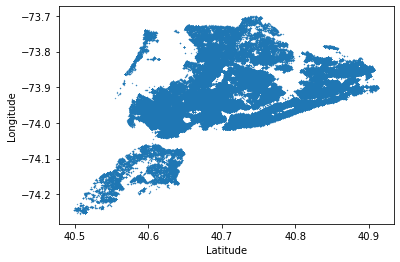

In [47]:
df.plot(kind = 'scatter',x='Latitude' , y='Longitude', s=0.1 , fig = (18,10))

In [48]:
df_brk= df[df['City']=='BROOKLYN']

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

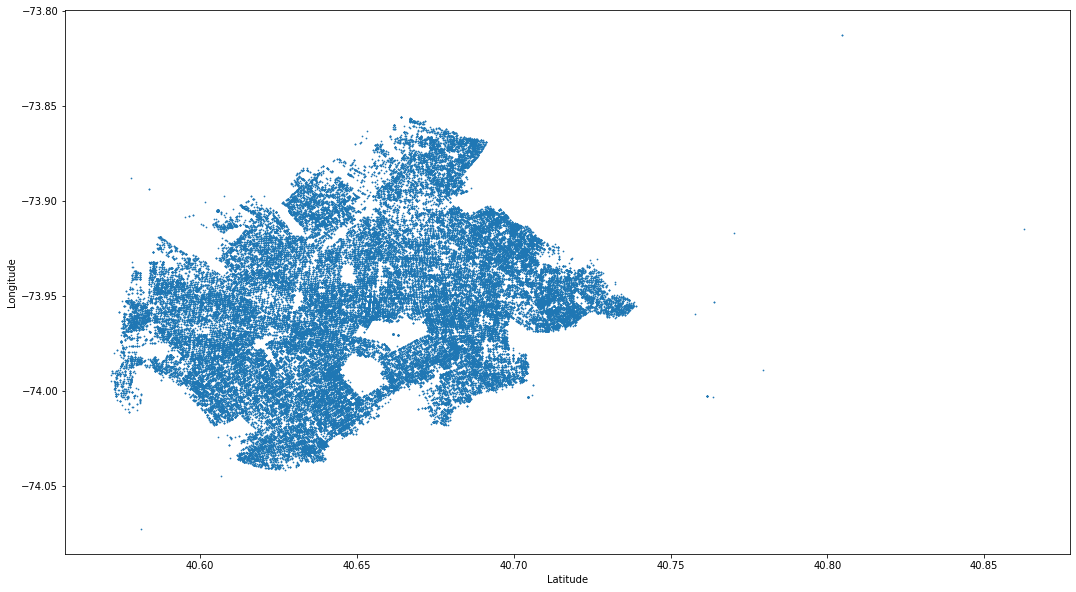

In [49]:
df_brk.plot(kind='scatter', x= 'Latitude' , y='Longitude' , s=0.5 , figsize = (18,10))

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

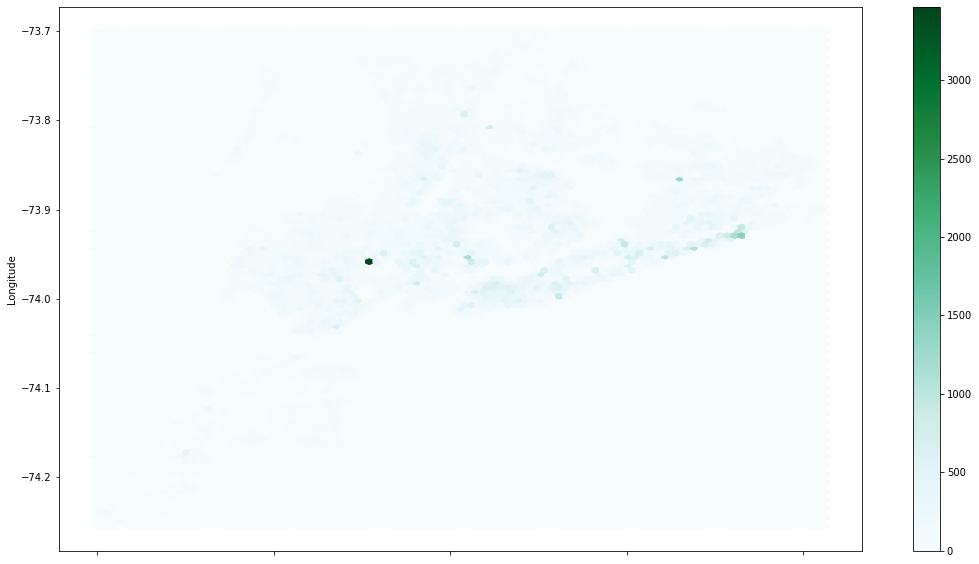

In [50]:
df.plot(kind='hexbin' , x ='Latitude', y='Longitude' , figsize=(18,10))

### Bar graph of count vs. complaint types

In [51]:
df['Complaint Type'].value_counts(normalize=True).cumsum()

Blocked Driveway             0.276721
Illegal Parking              0.530944
Noise - Street/Sidewalk      0.672738
Noise - Commercial           0.793731
Derelict Vehicle             0.853148
Noise - Vehicle              0.906232
Animal Abuse                 0.935146
Traffic                      0.949404
Homeless Encampment          0.962788
Vending                      0.974287
Noise - Park                 0.985558
Drinking                     0.989423
Noise - House of Worship     0.992358
Posting Advertisement        0.994226
Urinating in Public          0.995984
Bike/Roller/Skate Chronic    0.997295
Panhandling                  0.998192
Disorderly Youth             0.999056
Illegal Fireworks            0.999528
Graffiti                     0.999959
Agency Issues                0.999981
Squeegee                     0.999992
Ferry Complaint              0.999997
Animal in a Park             1.000000
Name: Complaint Type, dtype: float64

<AxesSubplot:>

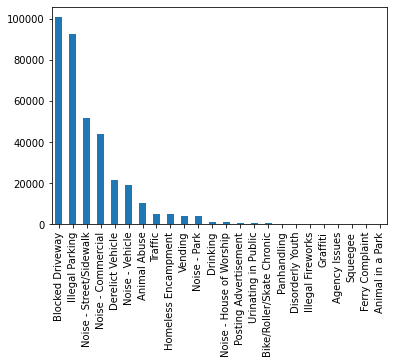

In [52]:
df['Complaint Type'].value_counts().plot(kind='bar')

In [53]:
df['Complaint Type'].value_counts() #already sorted in descending order

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

### Find the top 10 types of complaints

In [54]:
df['Complaint Type'].value_counts().head(10) #top 10 complaints

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

### Display the types of complaints in each city in a separate dataset



In [55]:
df.groupby(['City', 'Complaint Type']).agg({'Unique Key': 'count'})

Unique Key
City     Complaint Type                     
ARVERNE  Animal Abuse                     46
         Blocked Driveway                 50
         Derelict Vehicle                 32
         Disorderly Youth                  2
         Drinking                          1
...                                      ...
Woodside Blocked Driveway                 27
         Derelict Vehicle                  8
         Illegal Parking                 124
         Noise - Commercial                2
         Noise - Street/Sidewalk           5

[779 rows x 1 columns]

In [56]:
#OR

city_complaint= df.pivot_table(index='City' , columns='Complaint Type', values= 'Unique Key', aggfunc = 'count').fillna('')

In [57]:
city_complaint

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,,46.0,,,50.0,32.0,2.0,1.0,,1.0,...,14.0,2.0,29.0,10.0,1.0,,,1.0,1.0,1.0
ASTORIA,,170.0,,16.0,3436.0,426.0,5.0,43.0,,4.0,...,21.0,64.0,409.0,236.0,2.0,3.0,,60.0,10.0,57.0
Astoria,,,,,159.0,14.0,,,,,...,,,145.0,,,,,,,
BAYSIDE,,53.0,,,514.0,231.0,2.0,1.0,,3.0,...,3.0,4.0,17.0,24.0,,,,9.0,,2.0
BELLEROSE,,15.0,,1.0,138.0,120.0,2.0,1.0,,,...,1.0,1.0,13.0,11.0,1.0,1.0,,9.0,1.0,
BREEZY POINT,,2.0,,,3.0,3.0,,1.0,,,...,,,1.0,1.0,,,,,,
BRONX,,1971.0,,22.0,17063.0,2403.0,66.0,206.0,,15.0,...,90.0,548.0,9146.0,3556.0,20.0,18.0,,427.0,54.0,433.0
BROOKLYN,8.0,3203.0,,129.0,36780.0,6460.0,79.0,299.0,2.0,60.0,...,391.0,1601.0,14622.0,6024.0,52.0,59.0,,1261.0,155.0,582.0
CAMBRIA HEIGHTS,,15.0,,,177.0,148.0,,,,,...,2.0,,29.0,100.0,,,,7.0,,


### Visualiazation of all cities with major complaints

In [59]:
city_data= df[['City','Complaint Type']]
city_data

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
364553,WOODHAVEN,Illegal Parking
364554,BRONX,Noise - Vehicle
364555,NEW YORK,Noise - Street/Sidewalk
364556,BRONX,Blocked Driveway


In [60]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"[40.775945312321085, -73.91509393898605]"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"[40.870324522111424, -73.88852464418646]"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"[40.83599404683083, -73.82837939584206]"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"[40.733059618956815, -73.87416975810375]"


In [67]:
import matplotlib.pyplot as plt

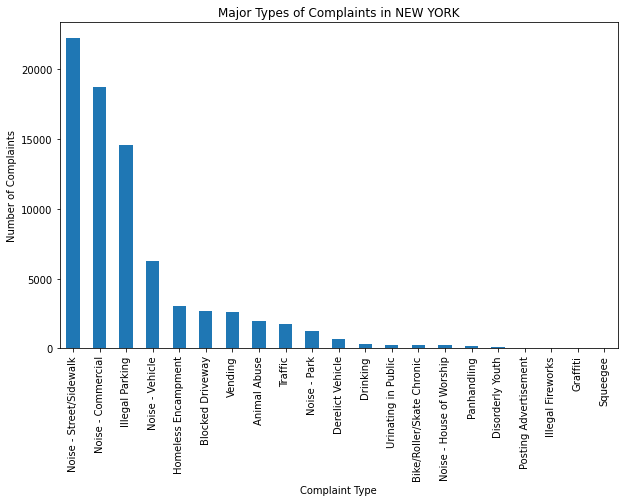

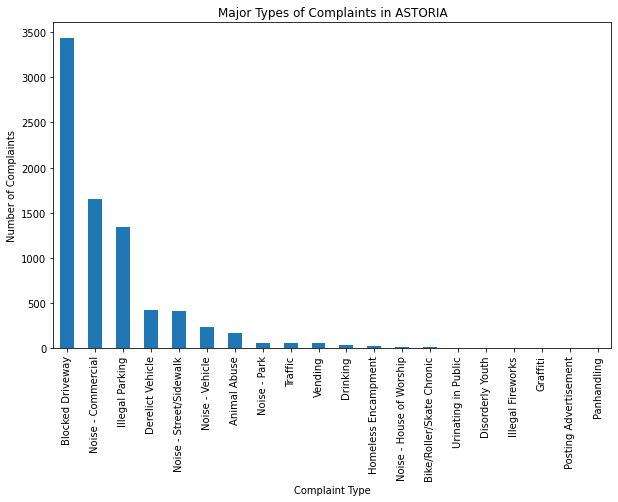

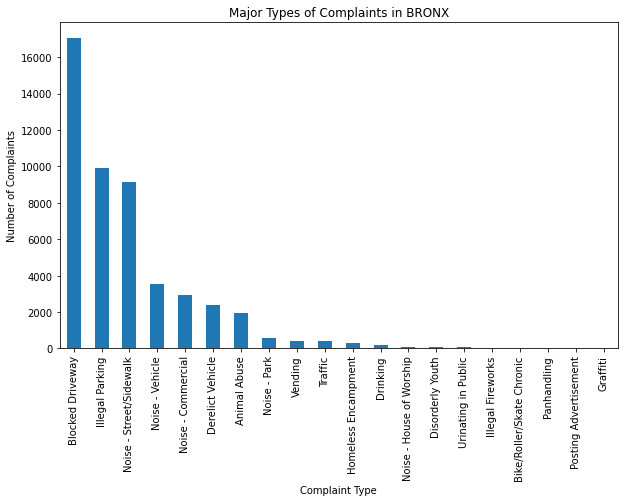

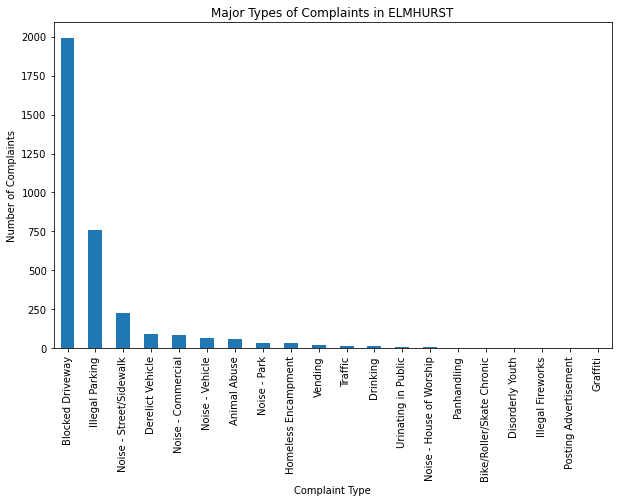

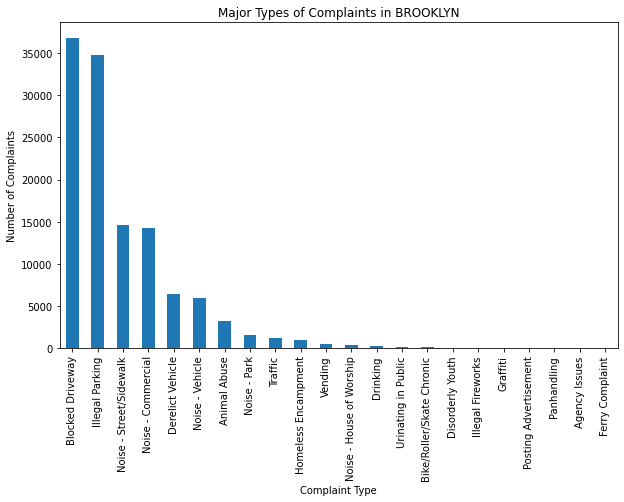

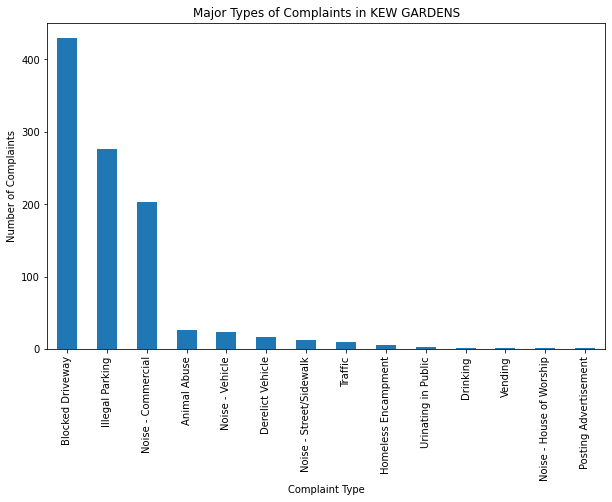

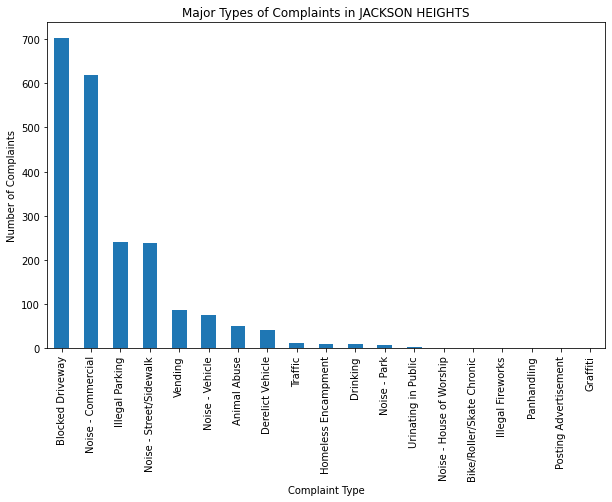

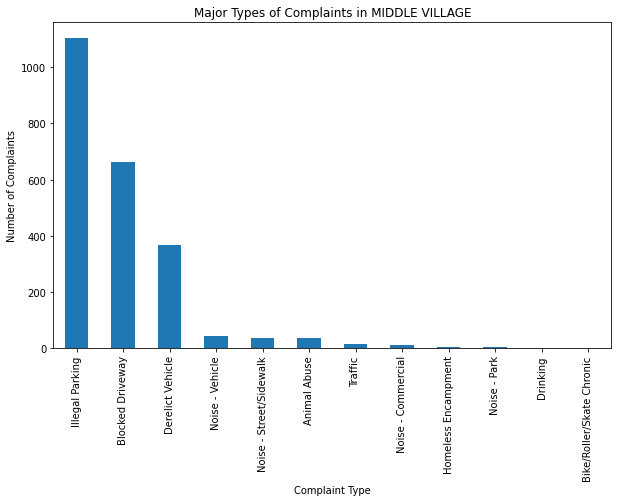

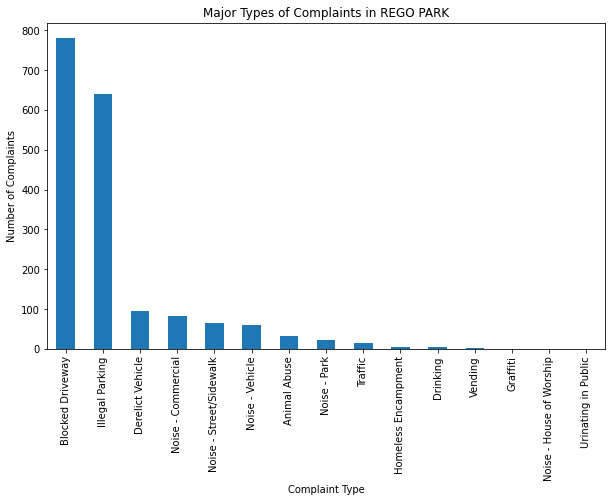

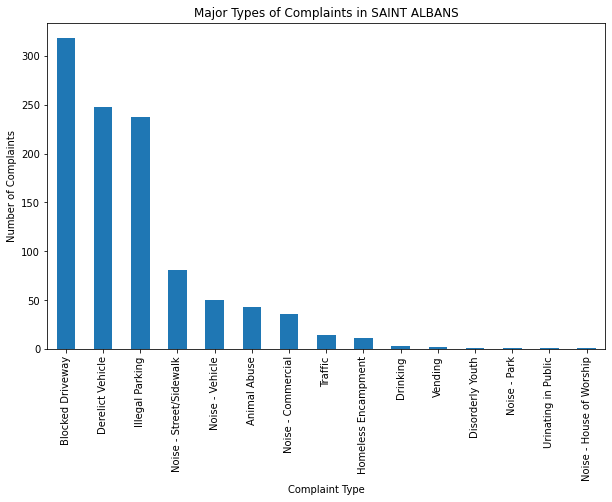

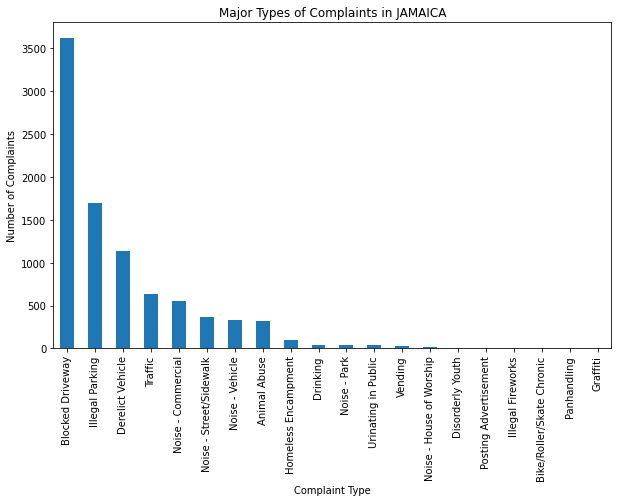

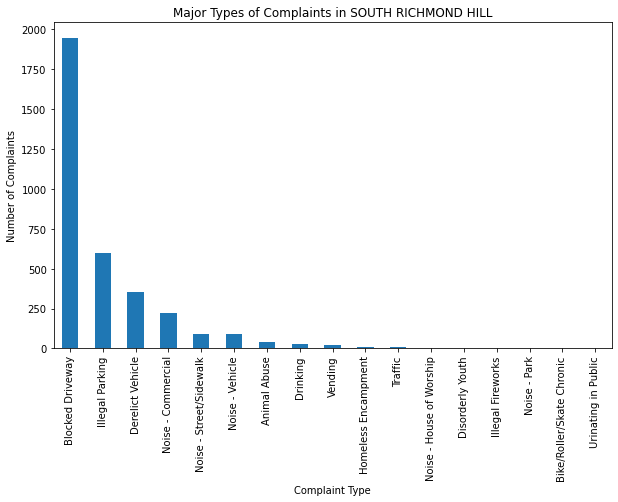

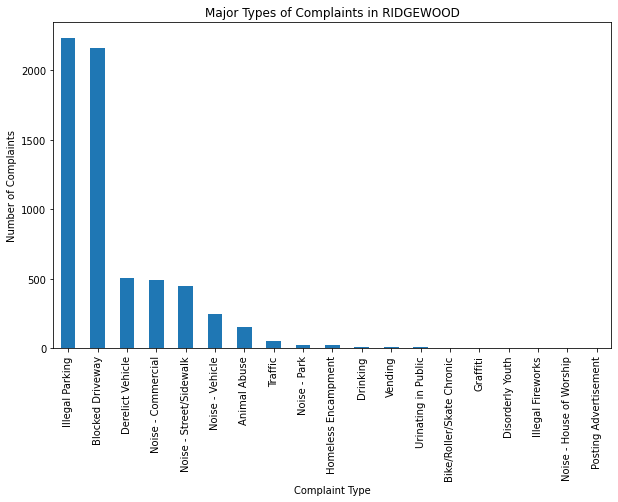

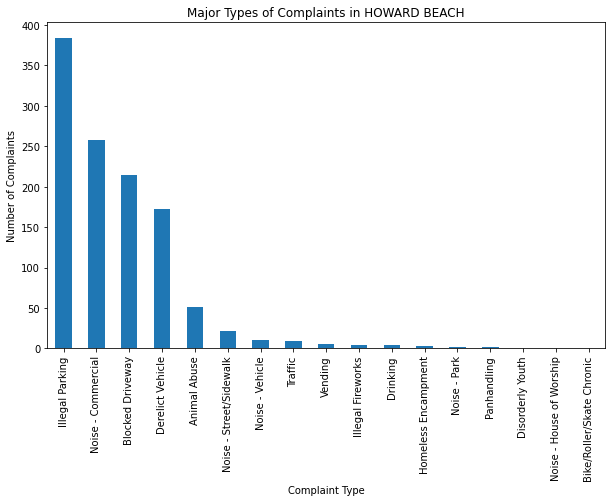

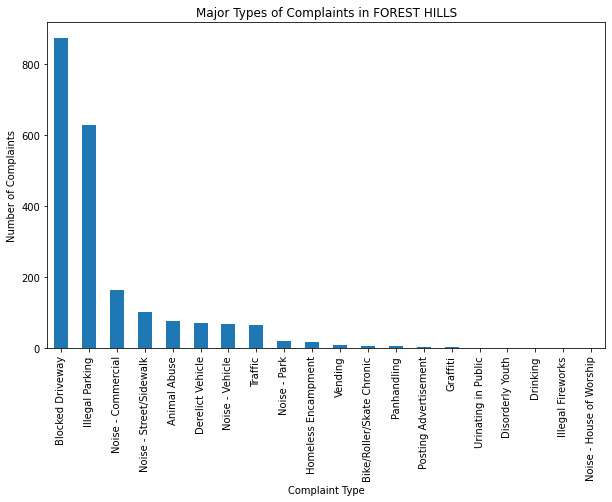

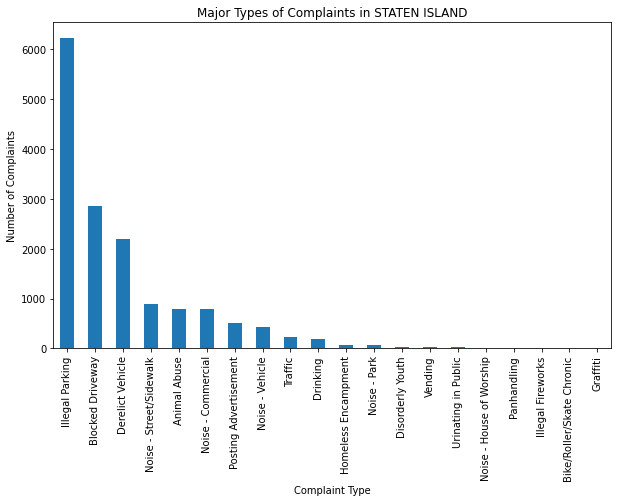

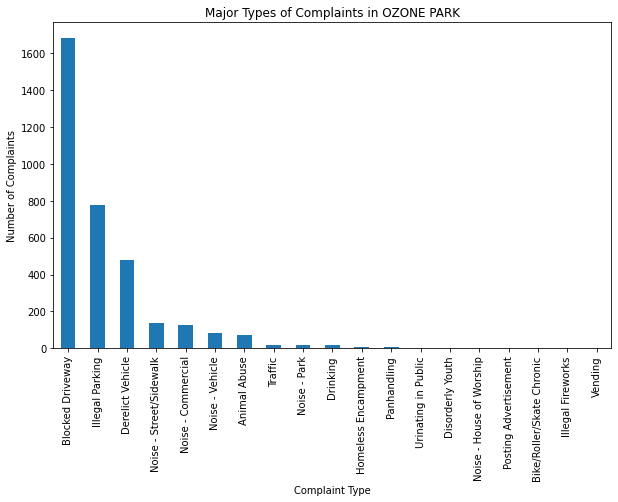

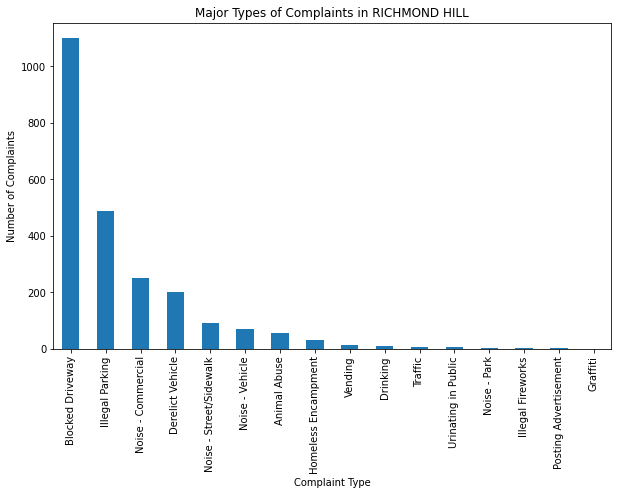

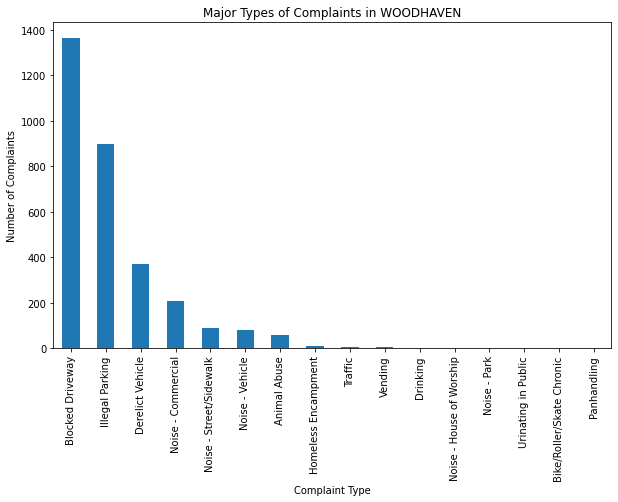

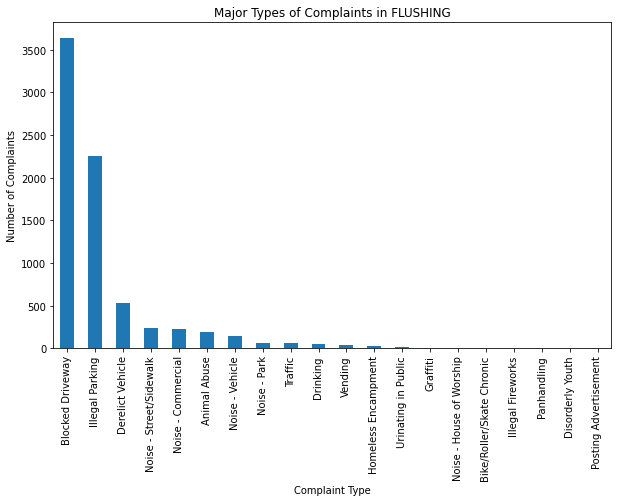

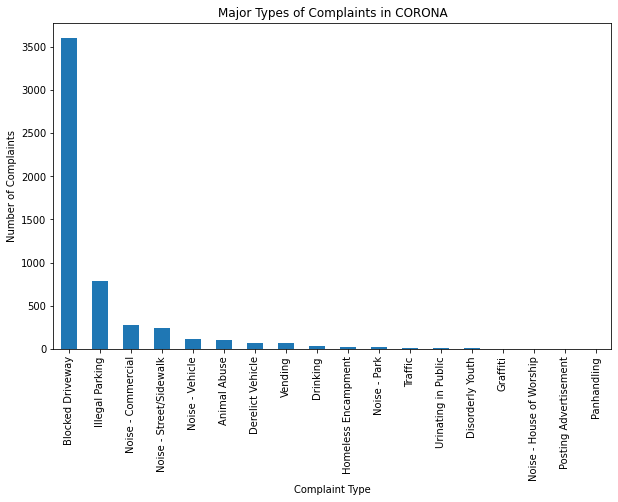

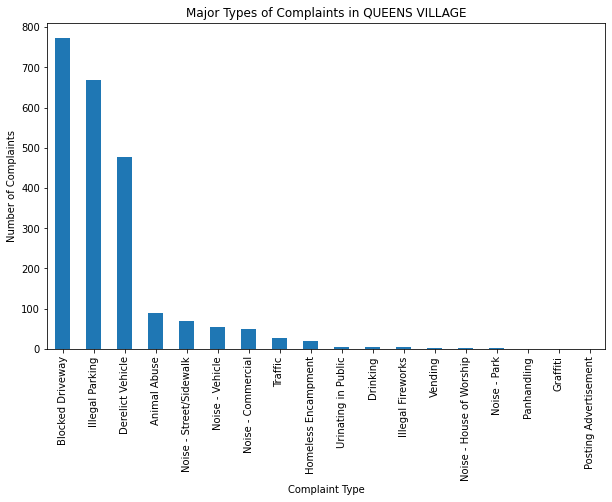

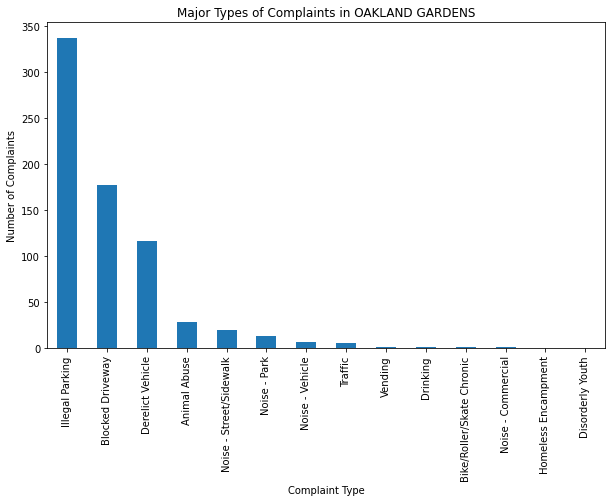

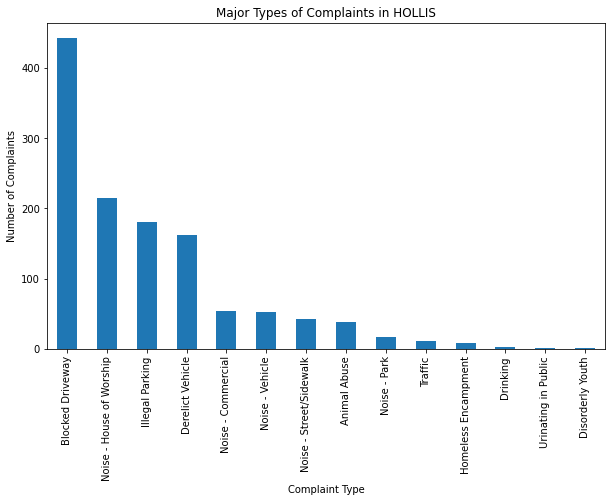

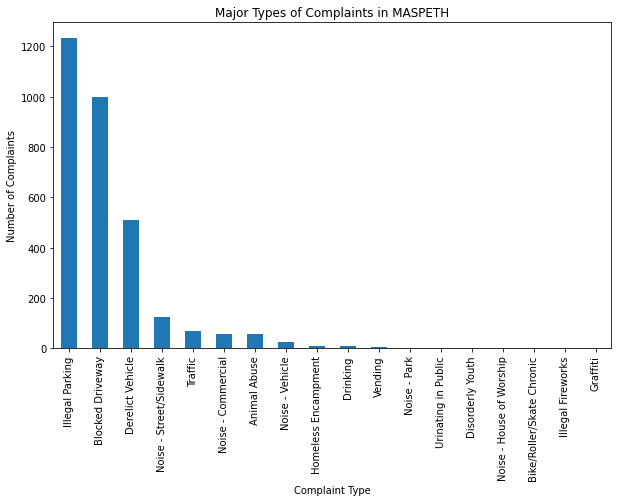

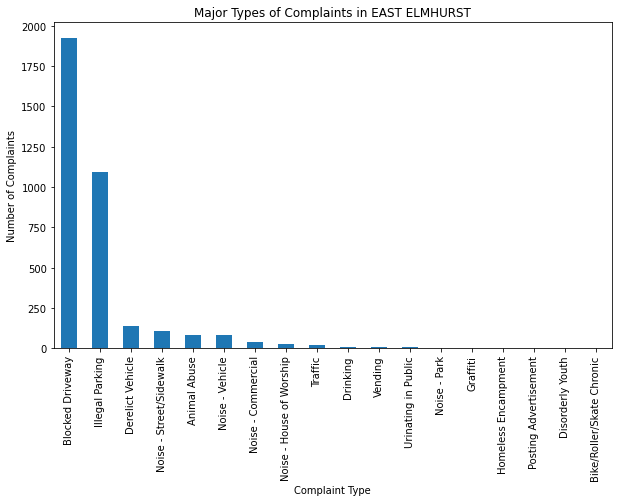

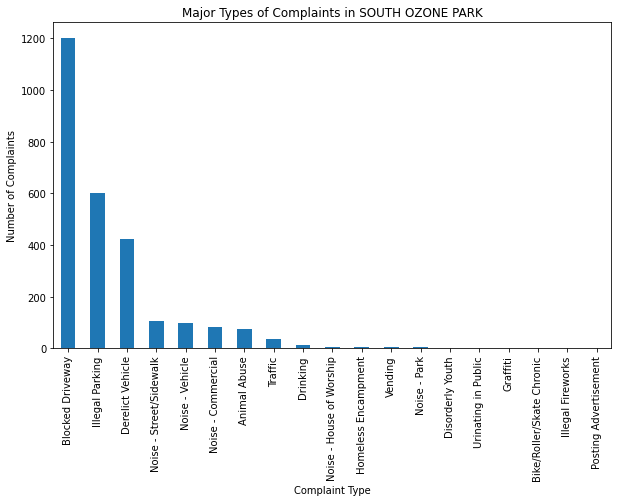

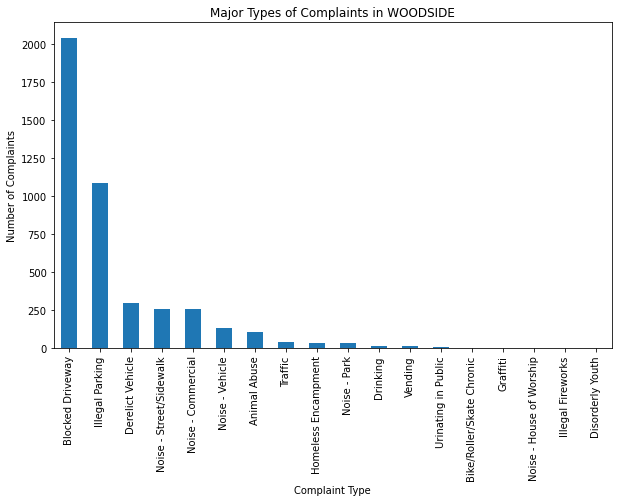

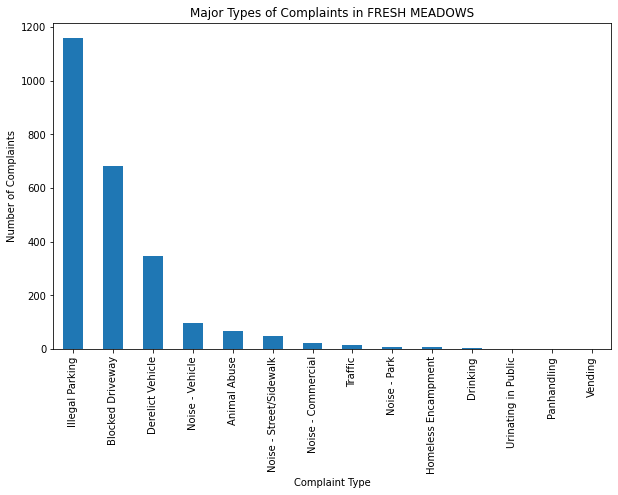

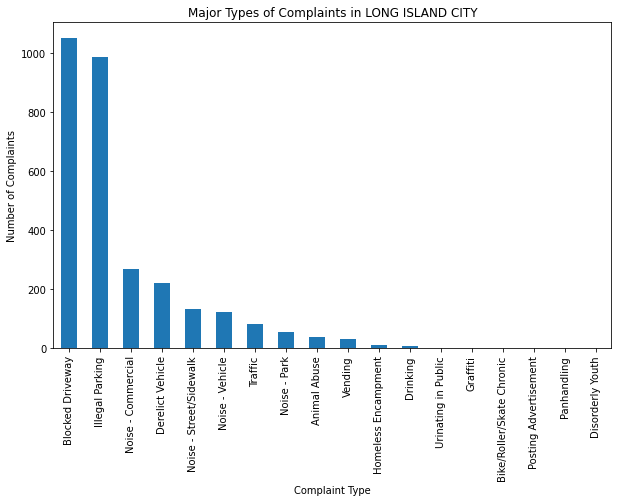

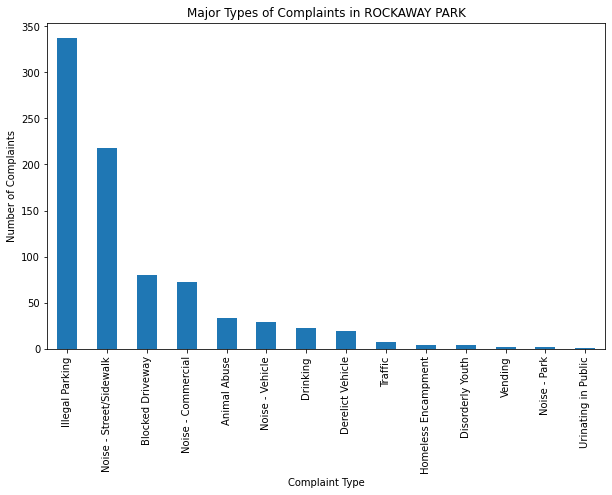

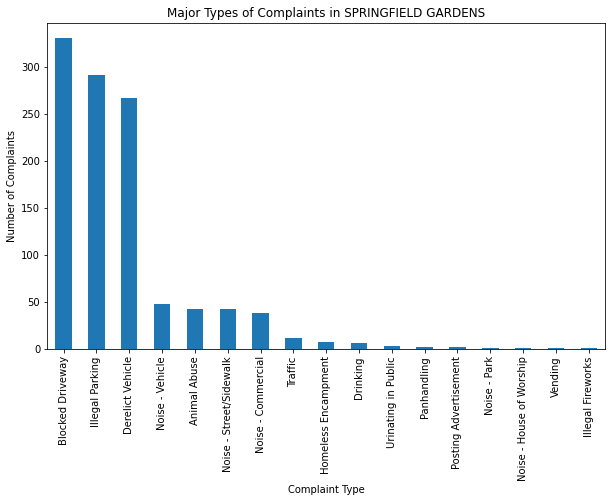

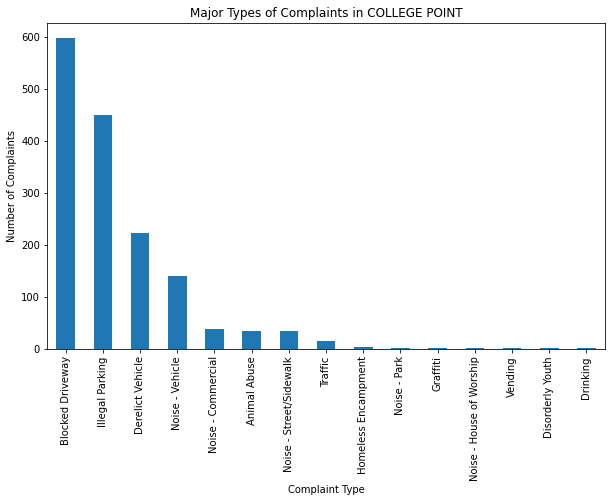

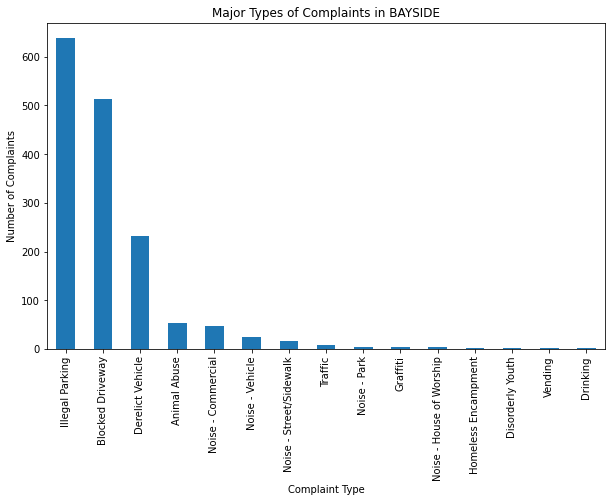

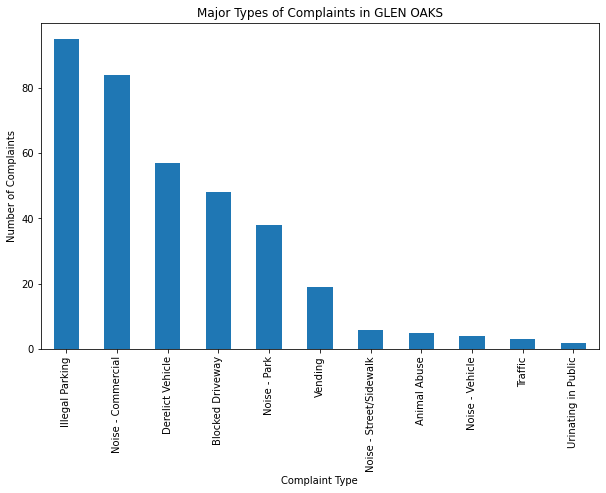

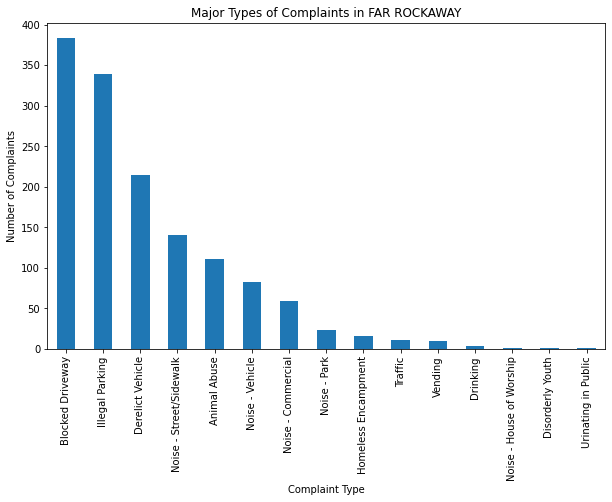

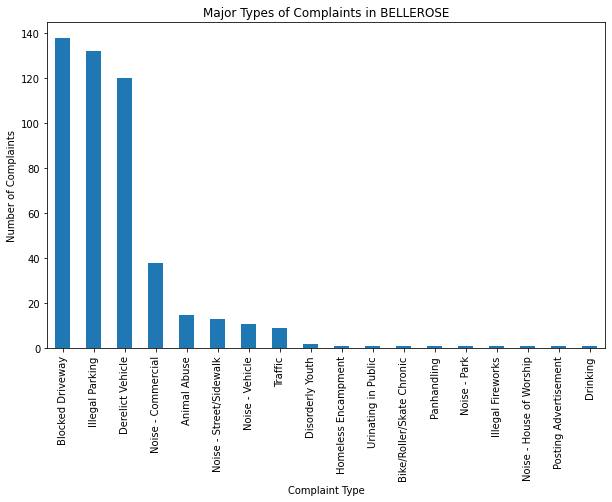

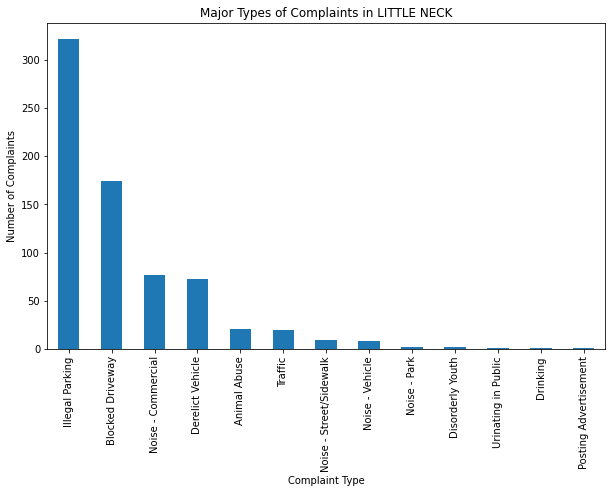

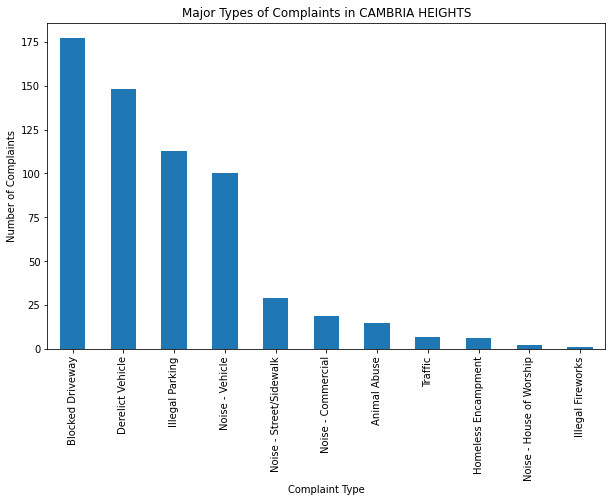

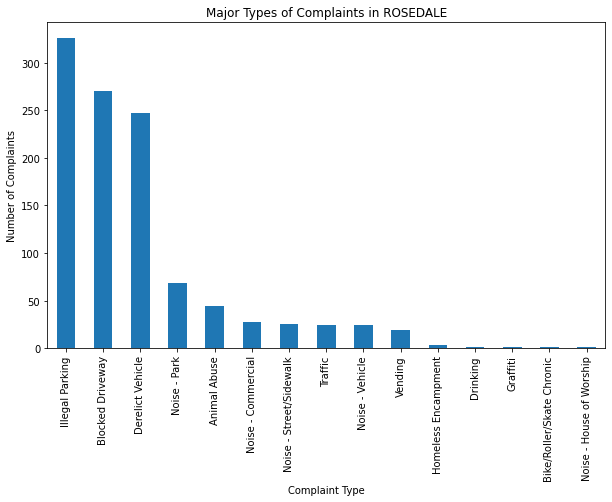

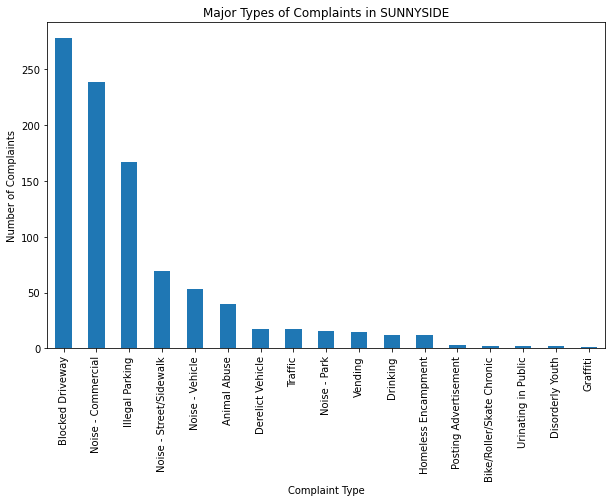

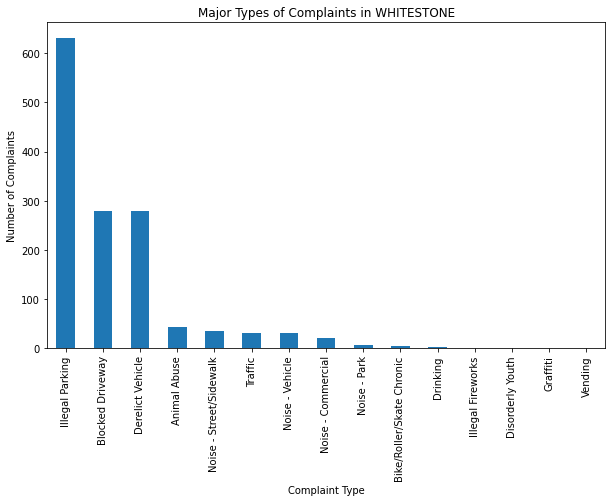

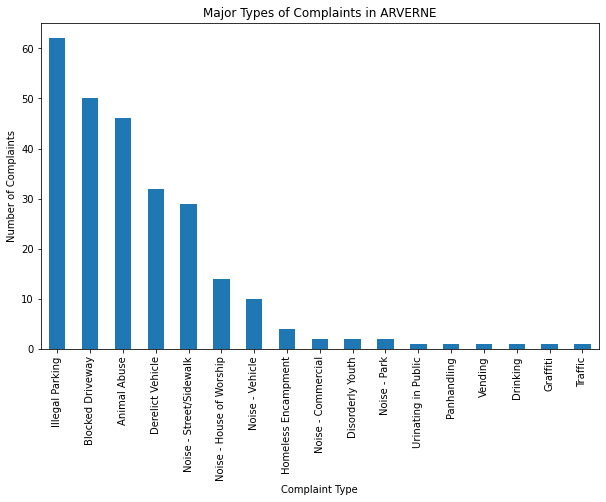

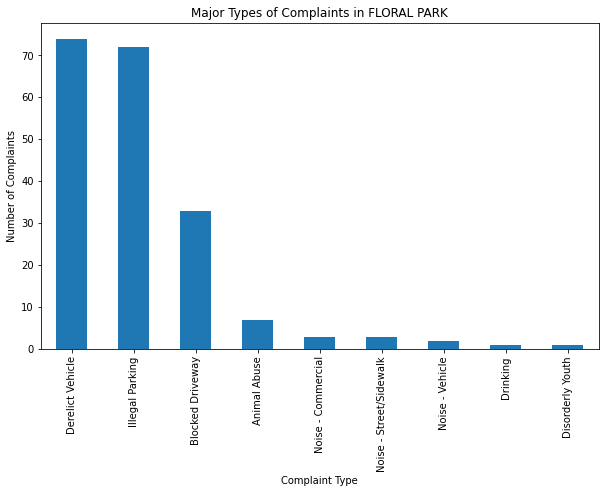

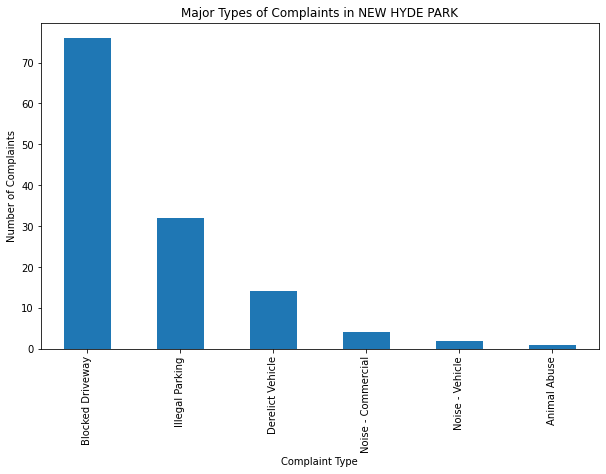

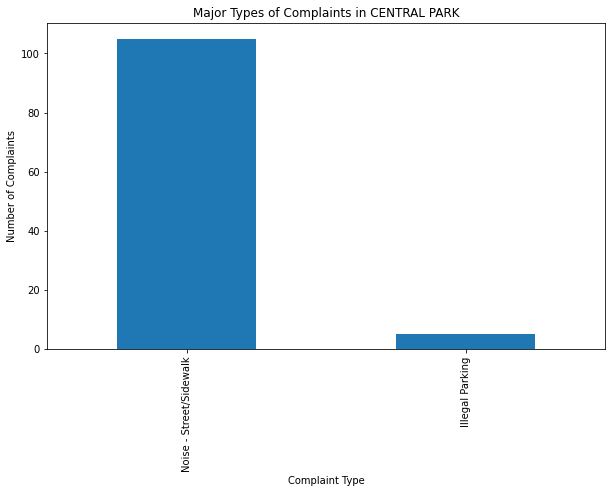

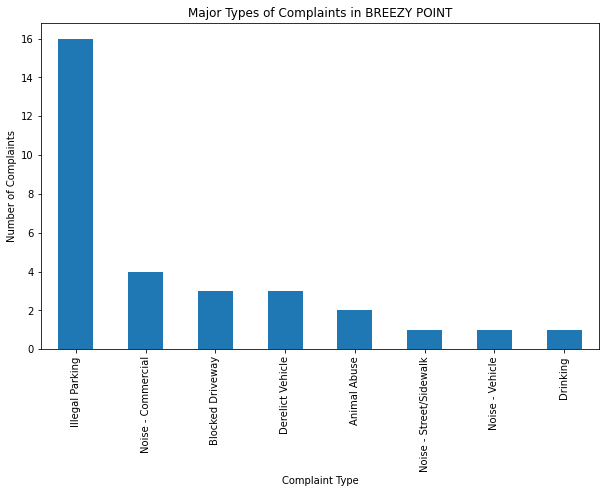

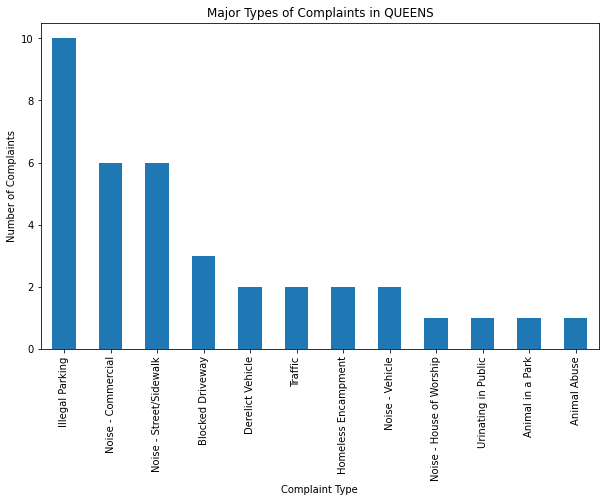

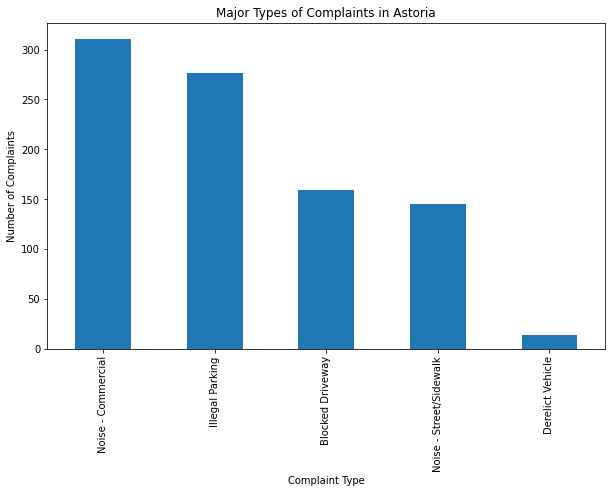

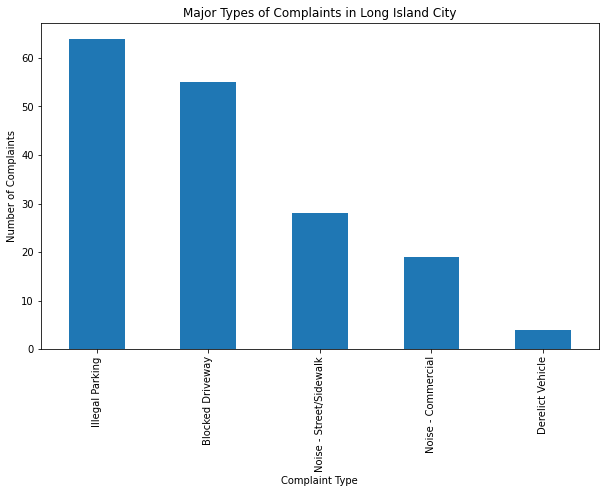

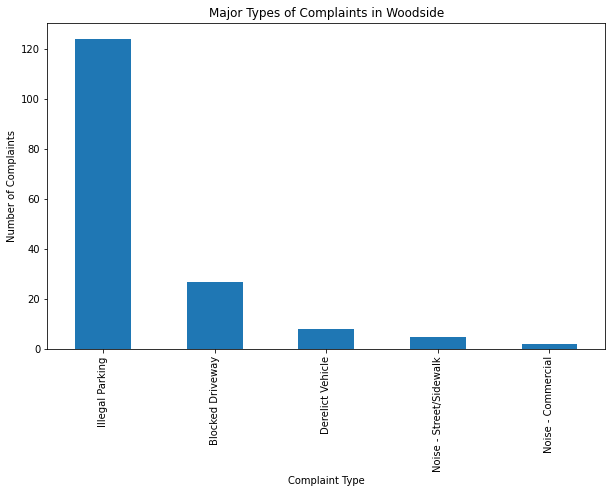

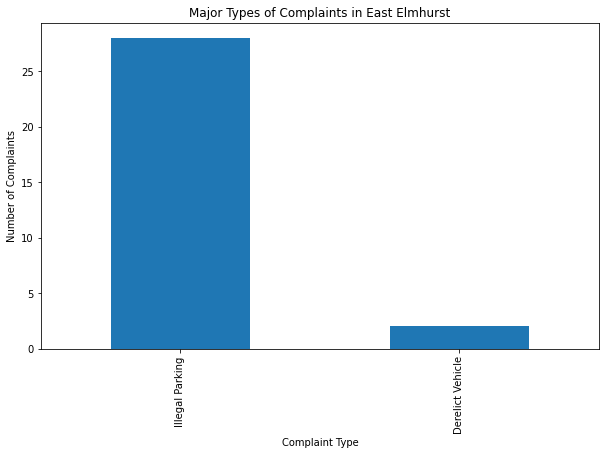

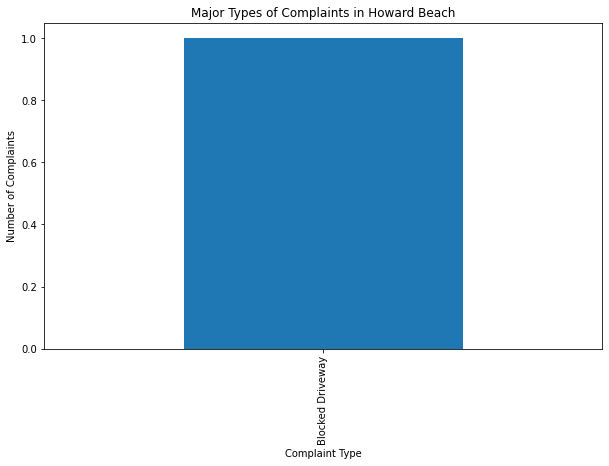

In [68]:
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    complaint_counts = city_data['Complaint Type'].value_counts()
    complaint_counts.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Complaint Type')
    plt.ylabel('Number of Complaints')
    plt.title(f'Major Types of Complaints in {city}')
    plt.show()

#### ------------------------------------------------------------------------------------------------

In [80]:
date_col =['Created Date' , 'Closed Date','Resolution Action Updated Date']

In [81]:
for i in date_col:
    df[i] = pd.to_datetime(df[i])
    print(i)

Created Date
Closed Date
Resolution Action Updated Date


In [82]:
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"[40.775945312321085, -73.91509393898605]"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"[40.870324522111424, -73.88852464418646]"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"[40.83599404683083, -73.82837939584206]"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"[40.733059618956815, -73.87416975810375]"


In [85]:
for i in ['Created Date','Resolution Action Updated Date']:
    df[i]=pd.to_datetime(df[i])

In [86]:
df['resolution_time']=df['Resolution Action Updated Date']-df['Created Date']

In [87]:
df['resolution_time_seconds']=df['resolution_time'].dt.seconds

df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,resolution_time,resolution_time_seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"[40.86568153633767, -73.92350095571744]",0 days 00:55:30,3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"[40.775945312321085, -73.91509393898605]",0 days 01:27:13,5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"[40.870324522111424, -73.88852464418646]",0 days 04:51:34,17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"[40.83599404683083, -73.82837939584206]",0 days 07:45:27,27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"[40.733059618956815, -73.87416975810375]",0 days 03:27:44,12464.0


In [88]:
df.groupby('City').agg({'resolution_time_seconds':'mean'})

,resolution_time_seconds
City,
ARVERNE,8269.640927
ASTORIA,15393.030159
Astoria,14165.198895
BAYSIDE,9588.416129
BELLEROSE,21263.784394
BREEZY POINT,12311.870968
BRONX,18661.916036
BROOKLYN,13585.011086
CAMBRIA HEIGHTS,21086.364668


In [89]:
df.groupby('City').agg({'resolution_time_seconds':'mean'}).sort_values('resolution_time_seconds')

,resolution_time_seconds
City,
ROCKAWAY PARK,8167.417569
ARVERNE,8269.640927
OAKLAND GARDENS,9244.072524
LITTLE NECK,9296.598315
FAR ROCKAWAY,9485.287044
BAYSIDE,9588.416129
NEW YORK,10099.136811
QUEENS,10338.486486
FLUSHING,10608.807507


In [ ]:
#floral park takes highest time for resolving the complaint and ROCKAWAY PARk takes least time